In [43]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [45]:
df=pd.read_csv("C:\\Users\\anjal\\Downloads\\Oasis infobyte data files\\WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [47]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [53]:
#Random Forest classifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'Id' column and separate features (X) and target (y)
X = df.drop(columns=['Id', 'quality'])
y = df['quality']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Confirm the shapes of the splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 11), (229, 11), (914,), (229,))

In [57]:
#Stochastic Gradient Descent (SGD)
'''The Random Forest classifier achieved an overall accuracy of 69% on the test set. Here's a summary of the classification report:

Class-wise performance:

Class 5: Precision = 72%, Recall = 80%, F1-score = 76%
Class 6: Precision = 67%, Recall = 66%, F1-score = 66%
Other classes (4, 7, 8): Lower or undefined metrics due to fewer or no samples predicted.
Macro average: Precision, recall, and F1-score are around 41-42% (weighed equally across classes).

Weighted average: F1-score = 68% (accounts for class imbalance).

Classes 4 and 8 are underrepresented in predictions, likely due to class imbalance.
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Random Forest model
rf_report = classification_report(y_test, y_pred_rf)
print(rf_report)

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76        96
           6       0.67      0.66      0.66        99
           7       0.68      0.65      0.67        26
           8       0.00      0.00      0.00         2

    accuracy                           0.69       229
   macro avg       0.41      0.42      0.42       229
weighted avg       0.67      0.69      0.68       229



C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


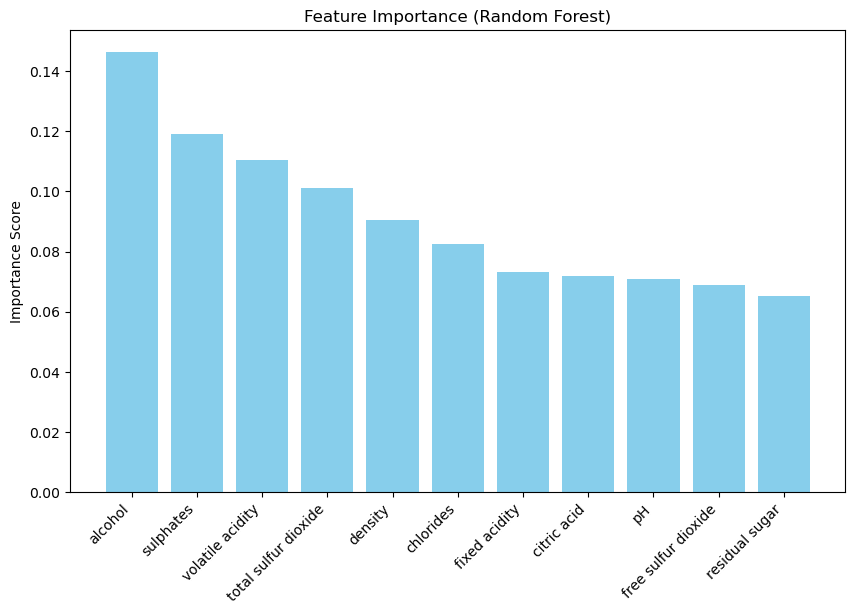

,Feature,Importance
10,alcohol,0.146276
9,sulphates,0.119159
1,volatile acidity,0.110288
6,total sulfur dioxide,0.101212
7,density,0.090431
4,chlorides,0.082482
0,fixed acidity,0.073160
2,citric acid,0.072021
8,pH,0.070924
5,free sulfur dioxide,0.068906


In [59]:
#Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.

# Get feature importance from the Random Forest model
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance (Random Forest)')
plt.ylabel('Importance Score')
plt.show()

# Display the importance data
importance_df


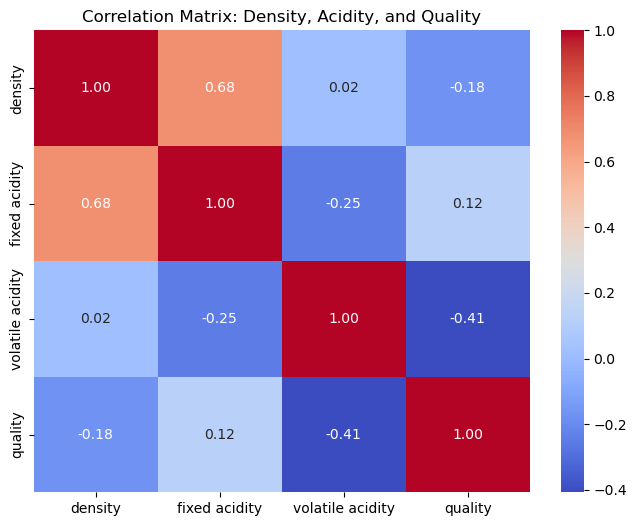

In [63]:
#analyzing the correlations between chemical qualities like density and different types of acidity 
#(e.g., fixed acidity, volatile acidity) with the target variable wine quality.

# Select features of interest
features_of_interest = ['density', 'fixed acidity', 'volatile acidity', 'quality']
subset_data = df[features_of_interest]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Density, Acidity, and Quality")
plt.show()

# A heatmap showing the correlations between density, acidity, and quality.
# The numerical correlation values inside the heatmap cells.

In [72]:
mean_quality = df.groupby('quality').mean()  # Average feature values by quality
mean_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


C:\Users\anjal\AppData\Local\Temp\ipykernel_15232\3163759547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


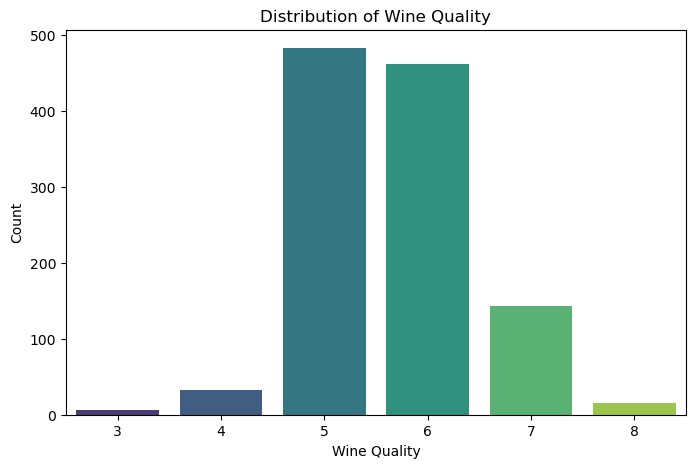

In [76]:
# Plot distribution of wine quality
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.show()

C:\Users\anjal\AppData\Local\Temp\ipykernel_15232\264364078.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='density', data=df, palette='coolwarm')


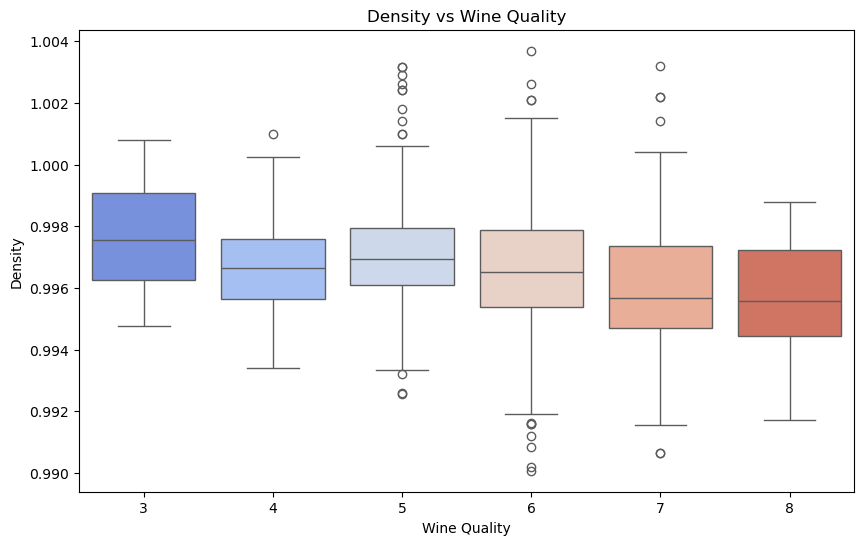

In [102]:
#Relationship Between Features and Quality
#Boxplot: Compare feature distributions (e.g., density, acidity) across different quality levels.
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', data=df, palette='coolwarm')
plt.title('Density vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Density')
plt.show()

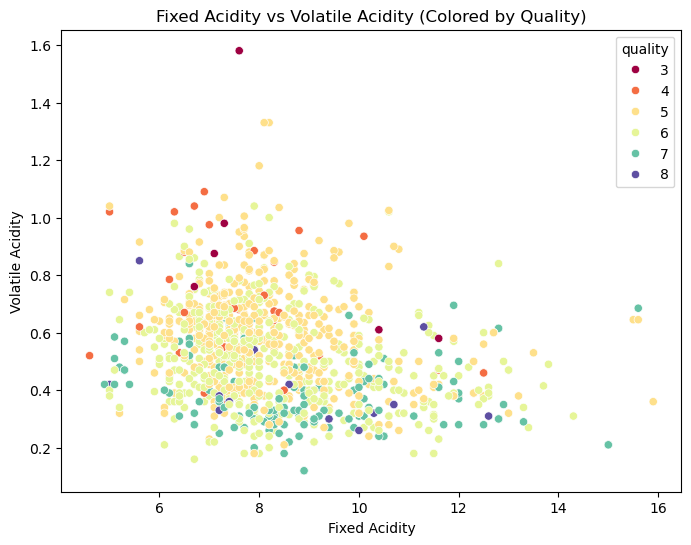

In [84]:
#Scatterplot: Visualize relationships between two continuous features (e.g., fixed acidity and volatile acidity) and color by quality.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='fixed acidity', y='volatile acidity', hue='quality', data=df, palette='Spectral')
plt.title('Fixed Acidity vs Volatile Acidity (Colored by Quality)')
plt.xlabel('Fixed Acidity')
plt.ylabel('Volatile Acidity')
plt.show()

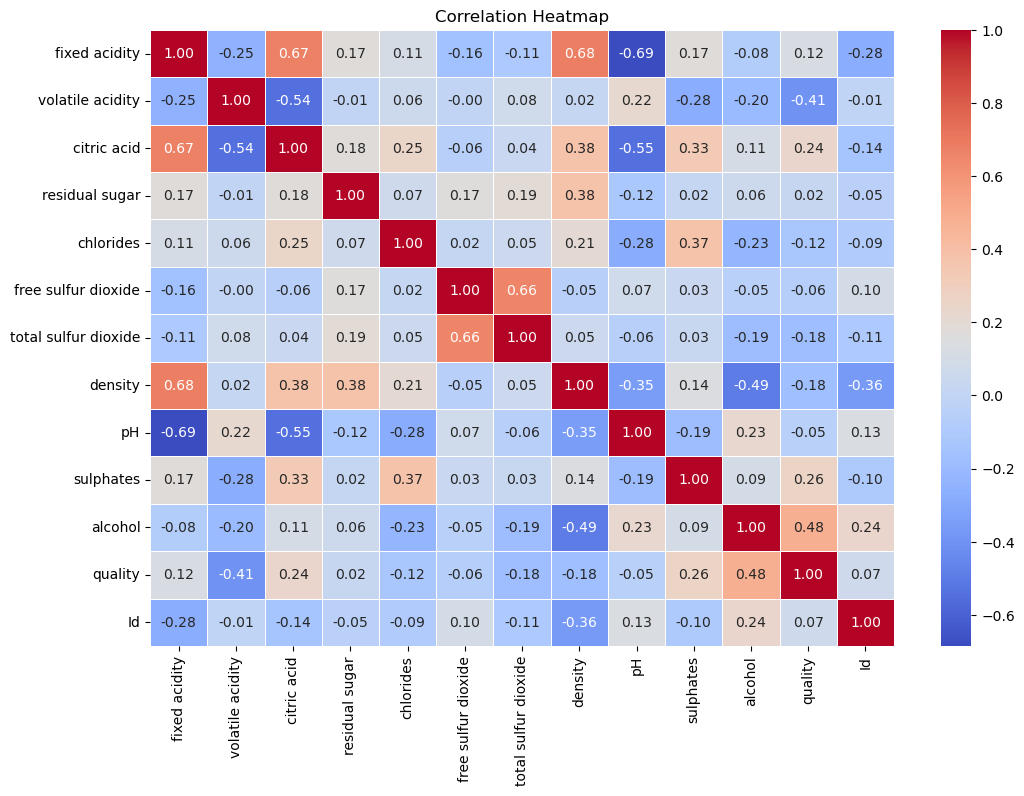

In [88]:
#Correlation Heatmap
#Visualize correlations between all features.
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

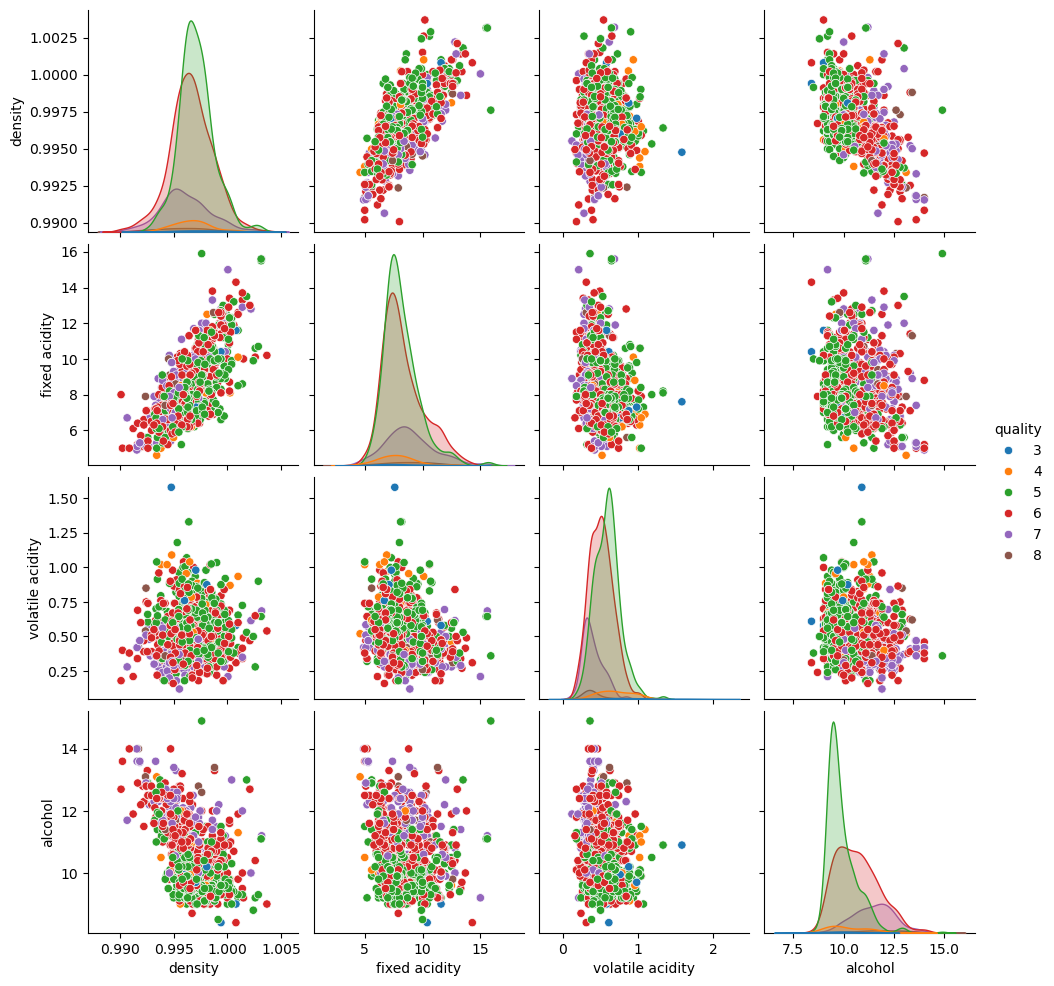

In [92]:
#Pairplot
#View pairwise relationships between key features and quality.
sns.pairplot(df, vars=['density', 'fixed acidity', 'volatile acidity', 'alcohol'], hue='quality', palette='tab10')
plt.show()

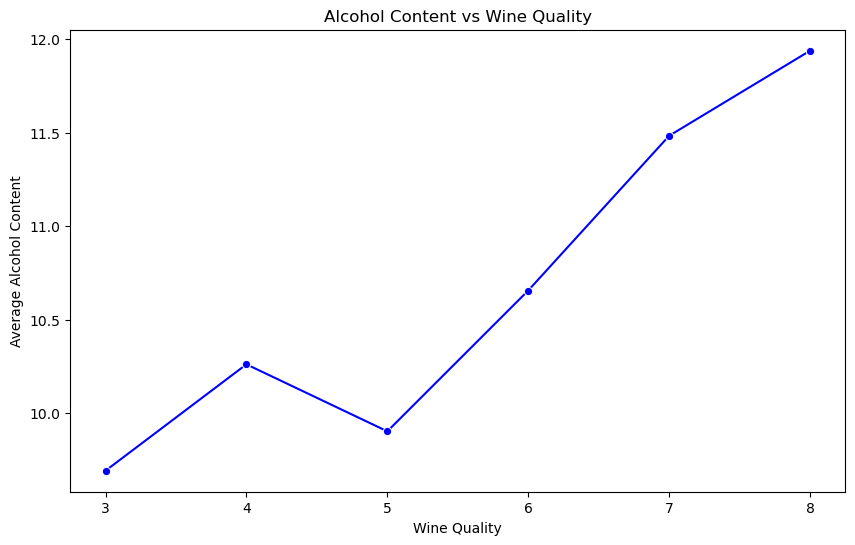

In [98]:
#Trend Analysis
#Lineplot: Examine trends in mean feature values across quality levels.
plt.figure(figsize=(10, 6))
sns.lineplot(x='quality', y='alcohol', data=df, marker='o', errorbar=None, color='b')
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Average Alcohol Content')
plt.show()